In [2]:
import csv


def extract_csv_data(file_path, field_name):
    with open(file_path, mode='r', newline='', encoding='utf-8') as file:
        reader = csv.DictReader(file)
        data = [float(row[field_name]) for row in reader if row[field_name]]
    return data

# Example usage
csv_file = 'DBtrainrides.csv'  # Replace with your file path
arrival_delay_data = extract_csv_data(csv_file, 'arrival_delay_m')
depature_delay_data = extract_csv_data(csv_file, 'departure_delay_m')

In [ ]:
import matplotlib.pyplot as plt

def plot_histogram(data, field_name):
    min_value = int(min(data))
    max_value = int(max(data))

    # relative_values = [value / max_value for value in data]
    bins = list(range(min_value, max_value + 2, 5))  # One-minute intervals
    
    plt.hist(data, bins=bins, edgecolor='black', align='left', density=True)
    plt.xlabel(field_name)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {field_name}')
    plt.xticks(bins, rotation=90)
    plt.show()

plot_histogram(depature_delay_data, 'departure_delay_m')

SyntaxError: expected argument value expression (3885512964.py, line 10)

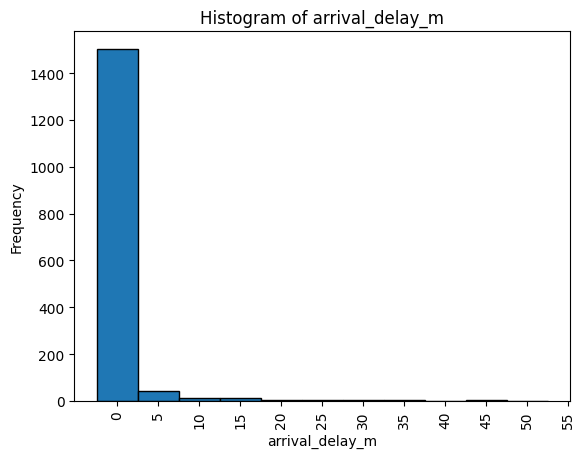

In [5]:
import csv
import matplotlib.pyplot as plt

def extract_csv_data_multiple(file_path, field_name, city_field, city_name):
    with open(file_path, mode='r', newline='', encoding='utf-8') as file:
        reader = csv.DictReader(file)
        data = [float(row[field_name]) for row in reader if row[field_name] and row[city_field] == city_name]
    return data


def plot_histogram(data, field_name):
    min_value = int(min(data))
    max_value = int(max(data))
    bins = list(range(min_value, max_value + 2, 5))  # One-minute intervals
    
    plt.hist(data, bins=bins, edgecolor='black', align='left')
    plt.xlabel(field_name)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {field_name}')
    plt.xticks(bins, rotation=90)
    plt.show()

# Example usage
csv_file = 'DBtrainrides.csv'  # Replace with your file path
field = 'arrival_delay_m'  # Column to extract
city_field = 'city'  # Column to filter by
city_name = 'Konstanz'  # City to filter

data = extract_csv_data_multiple(csv_file, field, city_field, city_name)

plot_histogram(data, field)

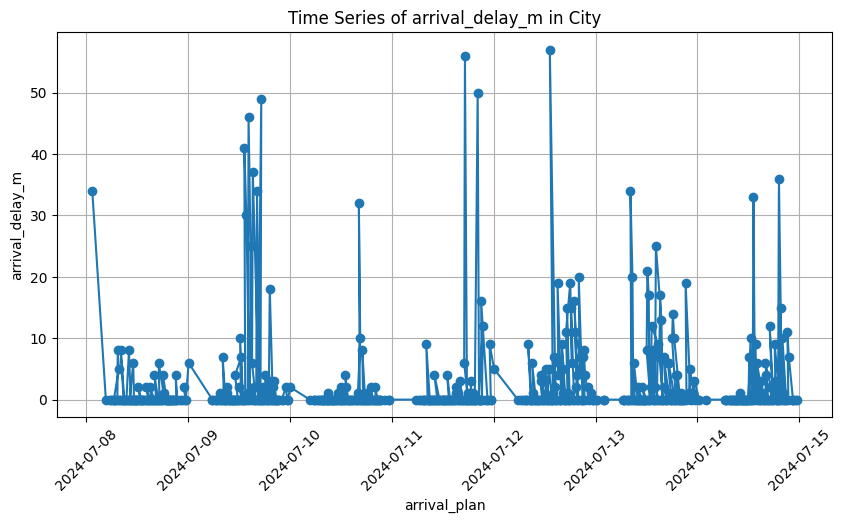

In [4]:
import csv
import matplotlib.pyplot as plt
import datetime

def extract_csv_data_time(file_path, field_name, city_field, city_name, time_field):
    with open(file_path, mode='r', newline='', encoding='utf-8') as file:
        reader = csv.DictReader(file)
        data = [(datetime.datetime.strptime(row[time_field], "%Y-%m-%d %H:%M:%S"), float(row[field_name]))
                for row in reader if row[field_name] and row[city_field] == city_name and row[time_field]]
    return data

def plot_time_series(data, time_field, field_name):
    times = [time for time, _ in data]
    values = [value for _, value in data]
    
    plt.figure(figsize=(10, 5))
    plt.plot(times, values, marker='o', linestyle='-')
    plt.xlabel(time_field)
    plt.ylabel(field_name)
    plt.title(f'Time Series of {field_name} in City')
    plt.xticks(rotation=45)
    plt.grid()
    plt.show()

# Example usage
csv_file = 'DBtrainrides.csv'  # Replace with your file path
field = 'arrival_delay_m'  # Column to extract
city_field = 'city'  # Column to filter by
city_name = 'Konstanz'  # City to filter
time_field = 'arrival_plan'  # Time column

data = extract_csv_data_time(csv_file, field, city_field, city_name, time_field)

plot_time_series(data, time_field, field)